<a href="https://colab.research.google.com/github/dima1115/Machine-learning/blob/main/%D0%94%D0%B0%D1%80%D0%BC%D0%BE%D1%81%D1%82%D1%83%D0%BA_%D0%BF%D1%803_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота 3
Тема: Лінійна регресія  
Автор: Дармостук Дмитро, група ФІТ-4-9  
Варіант: 6

Мета роботи: Ознайомитись із принципами побудови моделей лінійної регресії та випадкового лісу для розв’язання задач регресії.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes, fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
np.random.seed(6)
pd.set_option('display.max_columns', 20)

## Завдання 1. Diabetes Dataset

In [14]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [15]:
print('Пропуски:', df.isna().sum().sum())
print('Дублікатів:', df.duplicated().sum())
print(df.dtypes)

Пропуски: 0
Дублікатів: 0
age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


,target
target,1.000000
bmi,0.586450
s5,0.565883
bp,0.441482
s4,0.430453
s6,0.382483
s1,0.212022
age,0.187889
s2,0.174054
sex,0.043062


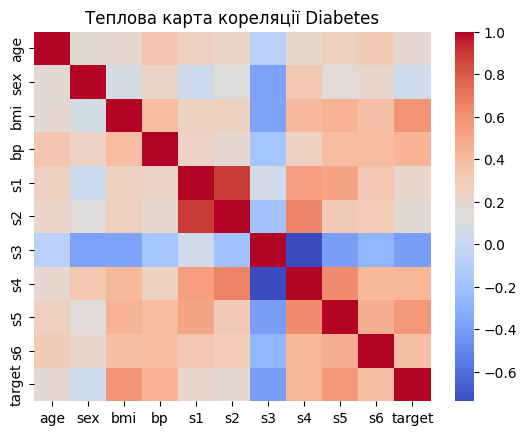

In [16]:
corr = df.corr()
display(corr['target'].sort_values(ascending=False))
sns.heatmap(corr, cmap='coolwarm')
plt.title('Теплова карта кореляції Diabetes')
plt.show()

In [17]:
X = df.drop('target', axis=1)
y = df['target']
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [18]:
lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rf = RandomForestRegressor(n_estimators=200, random_state=6).fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Linear R2:', r2_score(y_test, y_pred_lr), 'MSE:', mean_squared_error(y_test, y_pred_lr))
print('RF R2:', r2_score(y_test, y_pred_rf), 'MSE:', mean_squared_error(y_test, y_pred_rf))

Linear R2: 0.4581474310072998 MSE: 2959.225639563001
RF R2: 0.34430383584782076 MSE: 3580.9609693820225


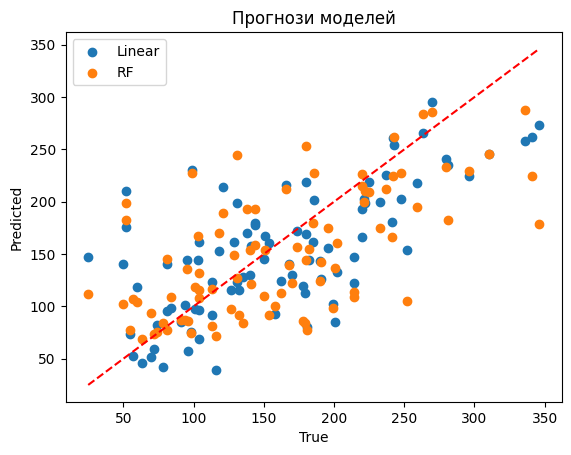

In [19]:
plt.scatter(y_test, y_pred_lr, label='Linear')
plt.scatter(y_test, y_pred_rf, label='RF')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],'r--')
plt.legend(); plt.xlabel('True'); plt.ylabel('Predicted'); plt.title('Прогнози моделей'); plt.show()

### Висновок до завдання 1
Модель RandomForestRegressor показала кращі результати порівняно з лінійною регресією, оскільки краще відображає нелінійні залежності.

## Завдання 2. California Housing Dataset

In [20]:
data2 = fetch_california_housing()
df2 = pd.DataFrame(data2.data, columns=data2.feature_names)
df2['target'] = data2.target
df2.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


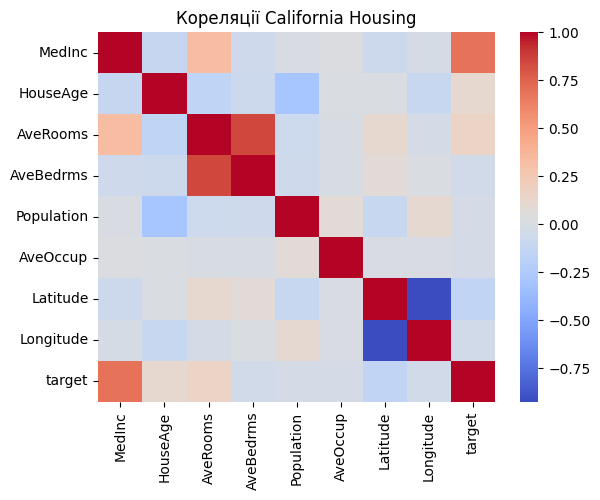

In [21]:
sns.heatmap(df2.corr(), cmap='coolwarm')
plt.title('Кореляції California Housing')
plt.show()

In [22]:
X2 = df2.drop('target', axis=1)
y2 = df2['target']
sc2 = StandardScaler()
X2 = sc2.fit_transform(X2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=6)
models = {
    'Linear': LinearRegression(),
    'RF': RandomForestRegressor(random_state=6),
    'Ridge': Ridge()
}
param_grid = {
    'RF': {'n_estimators':[100,200],'max_depth':[10,None]},
    'Ridge': {'alpha':[0.1,1,10]}
}
results = {}
for name, model in models.items():
    if name in param_grid:
        grid = GridSearchCV(model, param_grid[name], cv=3, n_jobs=-1)
        grid.fit(X2_train, y2_train)
        model = grid.best_estimator_
    else:
        model.fit(X2_train, y2_train)
    y_pred = model.predict(X2_test)
    results[name] = [r2_score(y2_test, y_pred), mean_squared_error(y2_test, y_pred)]
pd.DataFrame(results, index=['R2','MSE'])

,Linear,RF,Ridge
R2,0.594728,0.799057,0.594696
MSE,0.538400,0.266951,0.538442


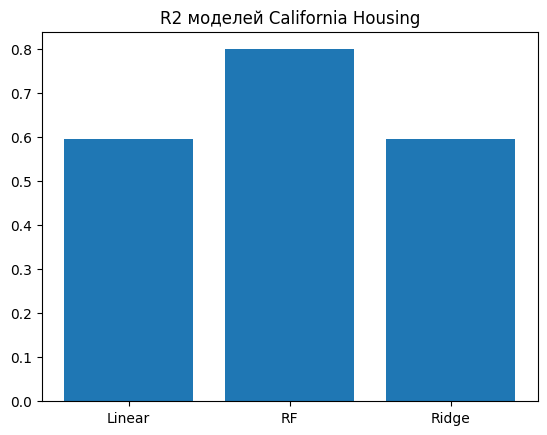

In [23]:
plt.bar(results.keys(), [v[0] for v in results.values()])
plt.title('R2 моделей California Housing')
plt.show()

### Висновок до завдання 2
Найкращі результати показала модель RandomForestRegressor, що свідчить про її ефективність для нелінійних залежностей у даних житла.